In [1]:
%matplotlib inline
import numpy as np
import networkx as nx
from networkx.algorithms import community #use community algorithm to detect communities within a graph
import itertools
import matplotlib.pyplot as plt

FileName="email-Eu-core-temporal-Dept1.txt"
Graphtype=nx.Graph()   # use net.DiGraph() for directed graph

# How to read from a file. Note: if your egde weights are int, change float to int.
G1 = nx.read_edgelist(FileName, create_using=Graphtype, nodetype=int, data=(('weight',int),))

for k in range(5,6):
    c = sorted(list(community.k_clique_communities(G1, k)),key=len)
    print("k="+str(k))
    for x in c:
        print(len(x))
    print("")

#k=5 seems to give best results

k=5
7
10
17
33
37
41
71



In [2]:
FileName="email-Eu-core-temporal-Dept2.txt"
Graphtype=nx.Graph()   # use net.DiGraph() for directed graph

# How to read from a file. Note: if your egde weights are int, change float to int.
G2 = nx.read_edgelist(FileName, create_using=Graphtype, nodetype=int, data=(('weight',int),))

for k in range(6,7):
    c = sorted(list(community.k_clique_communities(G2, k)), key=len)
    print("k="+str(k))
    for x in c:
        print(len(x))
    print("")

#k=6 seems to give best results

k=6
9
12
19
22
26
36



In [31]:
#taken from https://stackoverflow.com/questions/43541376/how-to-draw-communities-with-networkx

def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

k=8
{4, 37, 38, 49, 18, 53, 85, 26}
{0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 29, 30, 32, 35, 37, 39, 43, 44, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 71, 73, 76, 77, 78, 80, 83, 84, 85, 86, 87, 88, 89}

[0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 29, 30, 32, 35, 37, 38, 39, 43, 44, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 71, 73, 76, 77, 78, 80, 83, 84, 85, 86, 87, 88, 89]
k=9
{35, 48, 49, 17, 84, 87, 57, 30, 63}
{11, 44, 78, 49, 85, 23, 25, 58, 30}
{35, 71, 49, 17, 83, 23, 87, 58, 30, 63}
{1, 4, 5, 7, 8, 11, 12, 14, 15, 16, 17, 19, 21, 23, 24, 25, 26, 29, 30, 32, 35, 37, 39, 43, 44, 46, 48, 49, 50, 52, 54, 56, 57, 58, 60, 62, 63, 64, 65, 66, 67, 71, 73, 76, 77, 80, 83, 84, 85, 87, 88}

[1, 4, 5, 7, 8, 11, 12, 14, 15, 16, 17, 19, 21, 23, 24, 25, 26, 29, 30, 32, 35, 37, 39, 43, 44, 46, 48, 49, 50, 52, 54, 56, 57, 58, 6

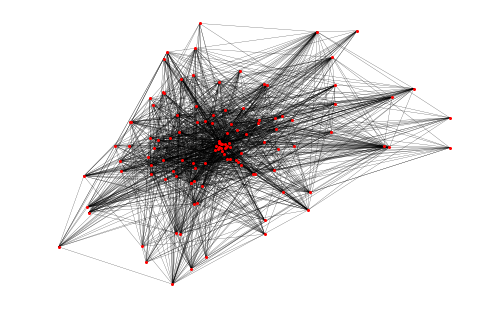

In [30]:
from networkx.algorithms import community

FileName="email-Eu-core-temporal-Dept3.txt"
Graphtype=nx.Graph()   # use net.DiGraph() for directed graph

# How to read from a file. Note: if your egde weights are int, change float to int.
G3 = nx.read_edgelist(FileName, create_using=Graphtype, nodetype=int, data=(('weight',int),))

for k in range(8,10):
    c = sorted(list(community.k_clique_communities(G3, k)),key=len)
    print("k="+str(k))
    for x in c:
        print(set(x))
    print("")
    if (k == 9):
        K = nx.induced_subgraph(G3, c[0].union(c[1]).union(c[2]).union(c[3]))
    else:
        K = nx.induced_subgraph(G3, c[0].union(c[1]))
    print(K.nodes())
    nx.draw_kamada_kawai(K, node_size = 4, arrowsize = 4, width = 0.2)
    plt.draw()
    #plt.show()
    plt.savefig(str(k)+'K3.png', dpi=800)

#k=8/9 seems to give best results

In [4]:
FileName="email-Eu-core-temporal-Dept4.txt"
Graphtype=nx.Graph()   # use net.DiGraph() for directed graph

# How to read from a file. Note: if your egde weights are int, change float to int.
G4 = nx.read_edgelist(FileName, create_using=Graphtype, nodetype=int, data=(('weight',int),))

for k in range(6,7):
    c = sorted(list(community.k_clique_communities(G4, k)),key=len)
    print("k="+str(k))
    for x in c:
        print(len(x))
    print("")

#k=6 seems to give best results

k=6
6
8
16
20
22
29



In [6]:
d = community.asyn_fluidc(G3, 5)
import community

number of communities: 10


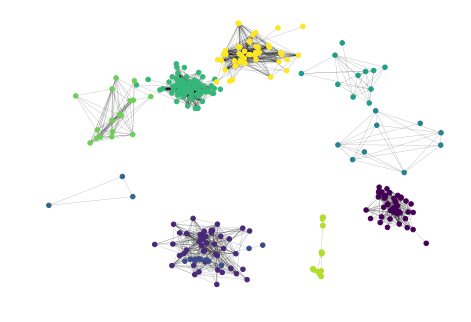

In [7]:
partition = community.best_partition(G1)
pos = community_layout(G1, partition)
print("number of communities: "+str(max(list(partition.values()))+1))
nx.draw(G1, pos, node_color=list(partition.values()), node_size = 20, arrowsize = 4, width = 0.1)
plt.savefig('louvain1.png', dpi=800)

number of communities: 6


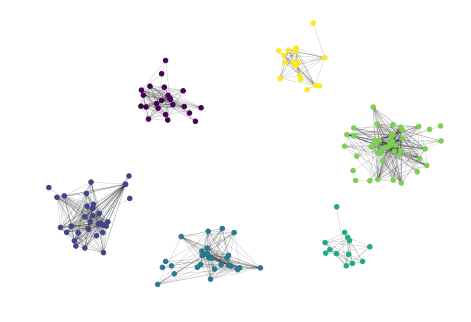

In [8]:
partition = community.best_partition(G2)
pos = community_layout(G2, partition)
print("number of communities: "+str(max(list(partition.values()))+1))
nx.draw(G2, pos, node_color=list(partition.values()), node_size = 20, arrowsize = 4, width = 0.1)
plt.savefig('louvain2.png', dpi=800)

number of communities: 5
25
22
23
11
{11: 0, 39: 0, 48: 1, 54: 1, 69: 0, 60: 0, 33: 2, 84: 1, 57: 1, 24: 1, 26: 3, 65: 1, 22: 2, 4: 3, 38: 3, 25: 2, 71: 0, 30: 0, 83: 4, 56: 4, 16: 2, 29: 0, 66: 0, 21: 0, 64: 2, 14: 2, 77: 2, 61: 1, 70: 4, 80: 1, 85: 3, 0: 4, 89: 2, 67: 1, 35: 2, 23: 0, 7: 0, 59: 0, 62: 0, 5: 0, 44: 0, 81: 0, 88: 2, 49: 2, 87: 4, 58: 0, 15: 2, 1: 2, 19: 2, 3: 2, 53: 3, 82: 4, 51: 3, 55: 1, 43: 1, 50: 1, 12: 0, 9: 2, 46: 3, 78: 0, 31: 0, 52: 1, 32: 1, 86: 2, 2: 1, 8: 0, 17: 1, 63: 1, 18: 3, 68: 0, 37: 3, 13: 2, 27: 3, 72: 4, 40: 1, 79: 2, 41: 1, 76: 1, 36: 2, 73: 2, 6: 3, 75: 0, 47: 0, 74: 2, 42: 4, 45: 1, 10: 2, 28: 0, 34: 1}


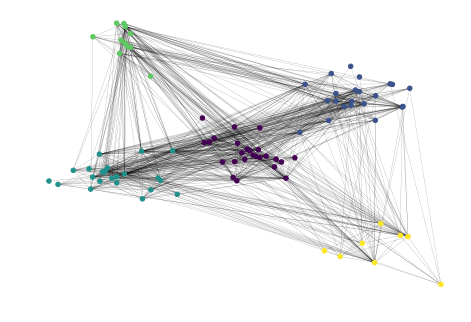

In [9]:
partition = community.best_partition(G3)
pos = community_layout(G3, partition)
print("number of communities: "+str(max(list(partition.values()))+1))
nx.draw(G3, pos, node_color=list(partition.values()), node_size = 20, arrowsize = 4, width = 0.1)
plt.savefig('louvain3.png', dpi=800)
print(sum(1 for x in partition.values() if x == 0))
print(sum(1 for x in partition.values() if x == 1))
print(sum(1 for x in partition.values() if x == 2))
print(sum(1 for x in partition.values() if x == 3))
print(partition)

number of communities: 6


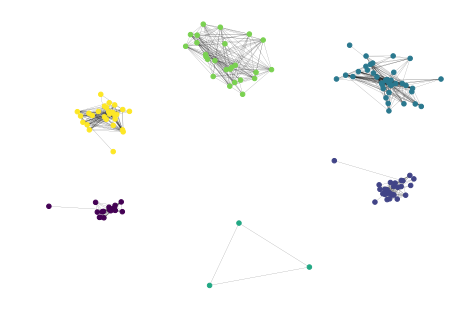

In [10]:
partition = community.best_partition(G4)
pos = community_layout(G4, partition)
print("number of communities: "+str(max(list(partition.values()))+1))
nx.draw(G4, pos, node_color=list(partition.values()), node_size = 20, arrowsize = 4, width = 0.1)
plt.savefig('louvain4.png', dpi=800)

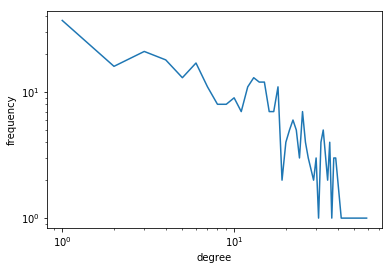

In [11]:
g = nx.degree_histogram(G1)
X = range(len(g))
X = list(filter(lambda a : g[a] != 0 , X)) #get rid of degrees with no corresponding nodes
Y = list(filter(lambda a : a != 0 , g))
plt.xlabel('degree')
plt.ylabel('frequency')
plt.loglog(X,Y)
plt.savefig('degree1.png', dpi=800)

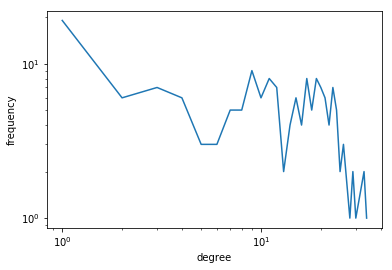

In [12]:
g = nx.degree_histogram(G2)
X = range(len(g))
X = list(filter(lambda a : g[a] != 0 , X)) #get rid of degrees with no corresponding nodes
Y = list(filter(lambda a : a != 0 , g))
plt.xlabel('degree')
plt.ylabel('frequency')
plt.loglog(X,Y)
plt.savefig('degree2.png', dpi=800)

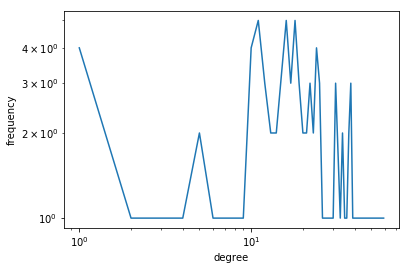

In [13]:
g = nx.degree_histogram(G3)
X = range(len(g))
X = list(filter(lambda a : g[a] != 0 , X)) #get rid of degrees with no corresponding nodes
Y = list(filter(lambda a : a != 0 , g))
plt.xlabel('degree')
plt.ylabel('frequency')
plt.loglog(X,Y)
plt.savefig('degree3.png', dpi=800)

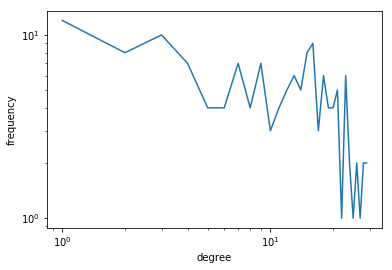

In [14]:
g = nx.degree_histogram(G4)
X = range(len(g))
X = list(filter(lambda a : g[a] != 0 , X)) #get rid of degrees with no corresponding nodes
Y = list(filter(lambda a : a != 0 , g))
plt.xlabel('degree')
plt.ylabel('frequency')
plt.loglog(X,Y)
plt.savefig('degree4.png', dpi=800)